# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Apartado 1: Clustering

__Número de grupo: 5__

__Nombres de los estudiantes: Gema Blanco Núñez y Diego Alejandro Rodríguez Pereira__

In [1]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Crea un dataframe a partir del fichero `countries_of_the_world.csv` que se proporciona junto con la práctica. Usa como índice el nombre de los países. 

Vamos a eliminar la columna `Region` por ser categórica y todas las filas en las que faltan valores usando la operación `dropna`.

Muestra el dataframe resultante y explica cuántos países y variables contiene.

In [2]:
import pandas as pd

filename = 'countries_of_the_world.csv'

column_names = ['Country', 'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
               'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)',
               'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 
                'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

df = pd.read_csv(filename, sep=',', names=column_names, skiprows=[0])

#Eliminamos la columna 'Region'
df = df.drop(['Region'], axis=1)

#Eliminamos todas las filas que contengan algún valor nulo (NaN)
#Luego reseteamos los índices
df = df.dropna()
df = df.reset_index(drop=True)

df

,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,Anguilla,13477,102,132.1,59.80,10.76,21.03,8600.0,95.0,460.0,0.00,0.00,100.00,2.0,14.17,5.34,0.040,0.180,0.780
4,Antigua & Barbuda,69108,443,156.0,34.54,-6.15,19.46,11000.0,89.0,549.9,18.18,4.55,77.27,2.0,16.93,5.37,0.038,0.220,0.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Venezuela,25730435,912050,28.2,0.31,-0.04,22.20,4800.0,93.4,140.1,2.95,0.92,96.13,2.0,18.71,4.92,0.040,0.419,0.541
175,Vietnam,84402966,329560,256.1,1.05,-0.45,25.95,2500.0,90.3,187.7,19.97,5.95,74.08,2.0,16.86,6.22,0.209,0.410,0.381
176,Yemen,21456188,527970,40.6,0.36,0.00,61.50,800.0,50.2,37.2,2.78,0.24,96.98,1.0,42.89,8.30,0.135,0.472,0.393
177,Zambia,11502010,752614,15.3,0.00,0.00,88.29,800.0,80.6,8.2,7.08,0.03,92.90,2.0,41.00,19.93,0.220,0.290,0.489


### Comentarios:

Hemos obtenido 179 países con 19 variables

Se han eliminado las filas (países) que contienían un valor nulo en alguna de sus variables.

A su vez hemos quitado la columna 'Region'.

## 2) Análisis de los datos

En este notebook vamos a trabajar con un subconjunto de las variables. Crea un nuevo dataframe que sólo contenga las variables `GDP ($ per capita)`, `Literacy (%)`, `Phones (per 1000)`, `Agriculture`, `Industry` y `Service`. ¿Qué crees que representan cada una de esas variables?

Analiza razonadamente las distribuciones de cada una de las variables (medias, desviaciones típicas, rangos, ...) y las principales relaciones entre pares de variables (diagrama de dispersión, coeficientes de correlación, ...).

In [3]:
#Nos quedamos con 6 variables del dataframe original
df2 = df.loc[:, ['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service']]

#También podría usarse filter
#df2 = df.filter(['GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Agriculture', 'Industry', 'Service'])
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,700.0,36.0,3.2,0.380,0.240,0.380
1,4500.0,86.5,71.2,0.232,0.188,0.579
2,6000.0,70.0,78.1,0.101,0.600,0.298
3,8600.0,95.0,460.0,0.040,0.180,0.780
4,11000.0,89.0,549.9,0.038,0.220,0.743
...,...,...,...,...,...,...
174,4800.0,93.4,140.1,0.040,0.419,0.541
175,2500.0,90.3,187.7,0.209,0.410,0.381
176,800.0,50.2,37.2,0.135,0.472,0.393
177,800.0,80.6,8.2,0.220,0.290,0.489


In [4]:
#Descripción del dataframe
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,9125.698324,81.944134,208.151955,0.156905,0.288028,0.554508
std,9644.123141,19.837537,210.121875,0.151343,0.140310,0.165670
min,500.000000,17.600000,0.200000,0.000000,0.032000,0.062000
25%,1800.000000,69.950000,27.100000,0.039000,0.197000,0.424500
50%,5100.000000,90.900000,137.100000,0.101000,0.274000,0.559000
75%,12950.000000,97.800000,335.000000,0.233000,0.349000,0.668500
max,37800.000000,100.000000,898.000000,0.769000,0.906000,0.954000


#### Coeficientes de Correlación (usando Pearson)

In [5]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df2.corr(method='pearson')

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
GDP ($ per capita),1.000000,0.522880,0.883520,-0.616919,0.032855,0.536551
Literacy (%),0.522880,1.000000,0.592042,-0.620514,0.105703,0.474395
Phones (per 1000),0.883520,0.592042,1.000000,-0.631578,-0.084247,0.649638
Agriculture,-0.616919,-0.620514,-0.631578,1.000000,-0.352785,-0.613489
Industry,0.032855,0.105703,-0.084247,-0.352785,1.000000,-0.521413
Service,0.536551,0.474395,0.649638,-0.613489,-0.521413,1.000000


#### Diagrama de Dispersión

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025AFAA034F0>,
      dtype=object)

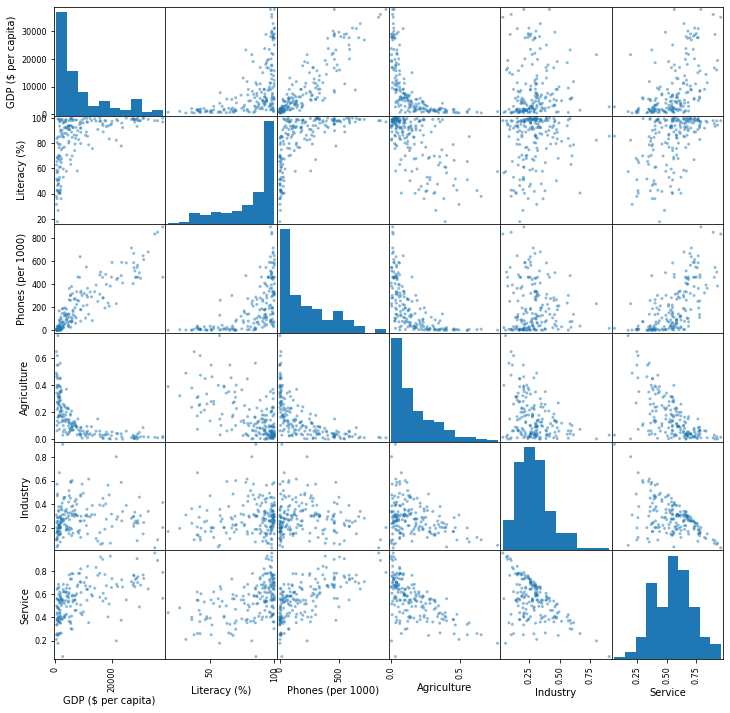

In [6]:
from pandas.plotting import scatter_matrix

#Diagrama de dispersión, con histogramas en la diagonal principal
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist')

#### Diagrama de Dispersión (usando Seaborn)

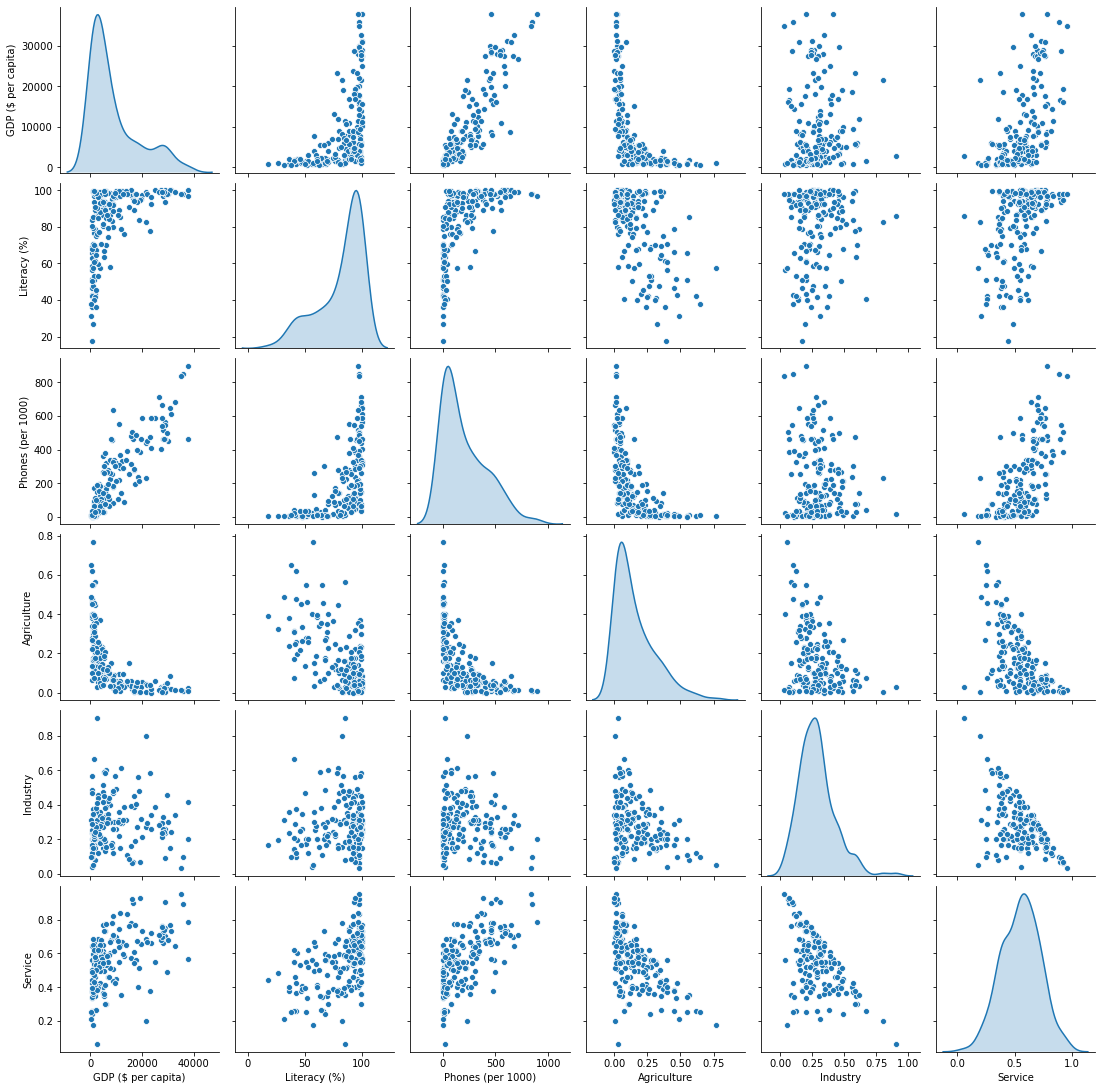

In [7]:
import seaborn as sns

sns.pairplot(df2, diag_kind='kde')

## Conclusiones

<em>¿Qué crees que representan cada una de esas variables?</em>

Estas variables representan cuán desarrolado está un país. Por tanto diríamos que estamos clasificando según desarollo. Ya que cada variable nos dice que tan desarrollado está esa área. Por ejemplo, que tan desarrollada la industria, los servicios, agriculuta, ect.

<em>Analiza razonadamente las distribuciones de cada una de las variables</em>

PIB(GDP) tiene un rango de valores muy altos, que a su vez tienen una desviación típica altísima en comparación al resto.
Alfabetismo (literacy), agricultura, industria y servicio son porcentajes. Pero a pesar de esto, agricultura, industria y servicio están en un rango de 0 a 1 (siendo 0 0% y 1 siendo 100%), Alfabetismo (literacy) tiene rangos de entre 0 y 100 (siendo 0 0% y 100 el 100%). Esto conllevaría que por lo menos Alfabetismo (literacy) lo escalemos para que tenga el mismo rango que los otros tres.

La única que aparenta seguir una distribución normal es la variable "servicio".
Algunas como alfabetismo, agricultura, industria y teléfonos, pensábamos que también seguían una distribución normal (con sesgos negativos y positivos) pero cuando intentamos en el siguiente apartado estandarizarlos, nos dió resultados con valores extraños, por lo cuál hemos determinado que no siguen una distrubución normal (y como se verá en el siguiente apartado, hemos normalizado)

El servicio sigue una distribución normal con distribución simétrica (ligeramente con sesgo negativo)

La variable teléfonos, se debería de cambiar de por cada 1.000 personas, a porcentaje. Y el porcentaje debería de estar entre rangos de 0 y 1. Para que de esta manera coincida con las variables agricultura, industria y servicio.

A su vez, también deberíamos de normalizar la variable PIB (GDP). Ya que esta tiene rangos de valores muy altos

Con respecto a la correlación entre variables.

El PIB (GDP) está muy correlacionada con teléfonos, y ligeramente correlacionada con alfabetismo y servicios e inversamente correlacionada con Agricultura.
Por tanto estás cuatro variables no aportan mucha información juntas.

Creemos que es suficiente teniendo PIB (GDP) y quitando Teléfonos y Agricultura (y capaz también a Servicios y en menor medida, a Alfabetismo)

Sin duda alguna la variable que menos aporta es teléfonos. Que está correlacionada con todas las demás variables (exceptuando Industria)

Y la variable que aporta más información en este caso es Industria. Ya que es la que menos correlación tiene con el resto.

## 3) Preprocesar los datos

Teniendo en cuenta que vamos a utilizar el algoritmo k-Means para encontrar grupos de países similares, explica razonadamente si es necesario o no cambiar la escalas de los datos y si a priori es mejor reescalarlos (MinMaxScaler) o estandarizarlos (StandarScaler).

Si decides preprocesarlos, accede al array interno del dataframe y crea un nuevo array con los datos escalados.

Como hemos visto en el apartado anterior, si es necesario cambiar la escala de los datos.

Pensamos que es necesario, ya que las variables tienen rangos de valores muy distintos.
Por ejemplo, Agricultura, Industria y Servicios tienen el mismo rango (de 0 a 1) y representa en proporsiones la presencia que tiene cada actividad en el país. 

Pero luego tenemos Alfabetismo, que describe la proporción de la población que es alfabeta, pero utiliza porcentaje en vez de proporciones, entonces en vez de tener rangos de 0 y 1, tiene rangos de entre 0 y 100. Por tanto debemos de escalar para que esta variable sea igual que las 3 anteriores, es decir, pasarlo a rangos de entre 0 y 1.

Con respecto a la variable Teléfonos, esta está por cada 1.000 personas, lo cual podríamos pasarla a porcentaje, aunque para que sea igual a las mencionadas anteriormente, necesitamos pasarlo a proporsiones. Así sus valores estarán como el resto (de entre 0 y 1)

Por último tenemos a la varialbe PIB (GDP) que si ya antes tenía bastante diferencia con respecto al resto, ahora que las otras están entre 0 y 1, esta tiene mucha más diferencia. Por tanto necesitamos que normalizar sus valores.

Como las variables que estamos escalando (Alfabetismo, Teléfonos y PIB) no siguen una distribución normal, tenemos que normalizadar y nos estandarizarlas. 

Una vez hagamos esto, evitaremos que alguna de las variables predomine y por tanto afecte al calcular los cluster. Por ejemplo la variable PIB predominaría con bastante importancia si no la escalamos.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()

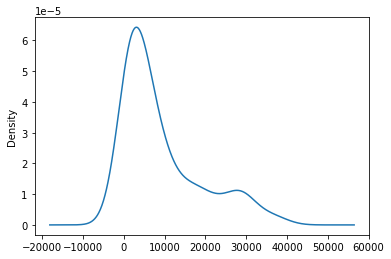

In [9]:
df2['GDP ($ per capita)'].plot.density()

#### Normalizamos PIB (GDP)

In [10]:
df3 = df2.loc[:, ['GDP ($ per capita)']]

scaler.fit(df3)
df3 = scaler.transform(df3)

df2['GDP ($ per capita)'] = df3

df3

array([[0.00536193],
       [0.10723861],
       [0.14745308],
       [0.21715818],
       [0.28150134],
       [0.28686327],
       [0.08042895],
       [0.73726542],
       [0.76407507],
       [0.79088472],
       [0.07774799],
       [0.43431635],
       [0.43967828],
       [0.03753351],
       [0.4075067 ],
       [0.15013405],
       [0.76675603],
       [0.11796247],
       [0.01608579],
       [0.95174263],
       [0.02144772],
       [0.05093834],
       [0.22788204],
       [0.19034853],
       [0.4155496 ],
       [0.48525469],
       [0.19034853],
       [0.01608579],
       [0.03485255],
       [0.00268097],
       [0.03753351],
       [0.03485255],
       [0.02412869],
       [0.92493298],
       [0.01608579],
       [0.01876676],
       [0.25201072],
       [0.12064343],
       [0.15549598],
       [0.00536193],
       [0.00536193],
       [0.00536193],
       [0.230563  ],
       [0.02412869],
       [0.06434316],
       [0.4075067 ],
       [0.82037534],
       [0.021

#### Normalizamos Teléfonos

In [11]:
df3 = df2.loc[:, ['Phones (per 1000)']]

scaler.fit(df3)
df3 = scaler.transform(df3)

df2['Phones (per 1000)'] = df3

df3

array([[0.0033415 ],
       [0.0790822 ],
       [0.08676765],
       [0.51214079],
       [0.61227445],
       [0.24526621],
       [0.21775451],
       [0.57462687],
       [0.62965026],
       [0.50345288],
       [0.15248385],
       [0.51280909],
       [0.31309869],
       [0.00790822],
       [0.53653375],
       [0.3552016 ],
       [0.51503676],
       [0.12864781],
       [0.01058142],
       [0.94809534],
       [0.01570506],
       [0.07986188],
       [0.08944086],
       [0.25072399],
       [0.56393406],
       [0.26397861],
       [0.37435955],
       [0.00757407],
       [0.01102695],
       [0.00356427],
       [0.0026732 ],
       [0.00612609],
       [0.18868345],
       [0.93127645],
       [0.00233905],
       [0.00122522],
       [0.23702384],
       [0.29683671],
       [0.19603475],
       [0.02706616],
       [0.        ],
       [0.00389842],
       [0.37926041],
       [0.01603921],
       [0.08298062],
       [0.3498552 ],
       [0.6843395 ],
       [0.025

#### Normalizamos Alfabetismo

In [12]:
df3 = df2.loc[:, ['Literacy (%)']]

scaler.fit(df3)
df3 = scaler.transform(df3)

df2['Literacy (%)'] = df3

df3

array([[0.22330097],
       [0.83616505],
       [0.63592233],
       [0.93932039],
       [0.86650485],
       [0.96480583],
       [0.98300971],
       [0.96359223],
       [1.        ],
       [0.97572816],
       [0.96359223],
       [0.94660194],
       [0.86771845],
       [0.30946602],
       [0.9684466 ],
       [0.99514563],
       [0.97572816],
       [0.92839806],
       [0.28276699],
       [0.97572816],
       [0.29854369],
       [0.84466019],
       [0.75485437],
       [0.83495146],
       [0.97330097],
       [0.92597087],
       [0.98300971],
       [0.1092233 ],
       [0.82160194],
       [0.41262136],
       [0.62864078],
       [0.74514563],
       [0.71601942],
       [0.97572816],
       [0.40533981],
       [0.36286408],
       [0.9538835 ],
       [0.88956311],
       [0.90898058],
       [0.47208738],
       [0.58131068],
       [0.80339806],
       [0.95145631],
       [0.40412621],
       [0.96359223],
       [0.99878641],
       [1.        ],
       [0.610

In [13]:
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,0.005362,0.223301,0.003342,0.380,0.240,0.380
1,0.107239,0.836165,0.079082,0.232,0.188,0.579
2,0.147453,0.635922,0.086768,0.101,0.600,0.298
3,0.217158,0.939320,0.512141,0.040,0.180,0.780
4,0.281501,0.866505,0.612274,0.038,0.220,0.743
...,...,...,...,...,...,...
174,0.115282,0.919903,0.155825,0.040,0.419,0.541
175,0.053619,0.882282,0.208844,0.209,0.410,0.381
176,0.008043,0.395631,0.041212,0.135,0.472,0.393
177,0.008043,0.764563,0.008911,0.220,0.290,0.489


In [14]:
df2.describe()

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,0.231252,0.780875,0.231624,0.156905,0.288028,0.554508
std,0.258556,0.240747,0.234041,0.151343,0.140310,0.165670
min,0.000000,0.000000,0.000000,0.000000,0.032000,0.062000
25%,0.034853,0.635316,0.029962,0.039000,0.197000,0.424500
50%,0.123324,0.889563,0.152484,0.101000,0.274000,0.559000
75%,0.333780,0.973301,0.372912,0.233000,0.349000,0.668500
max,1.000000,1.000000,1.000000,0.769000,0.906000,0.954000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A806112E0>,
      dtype=object)

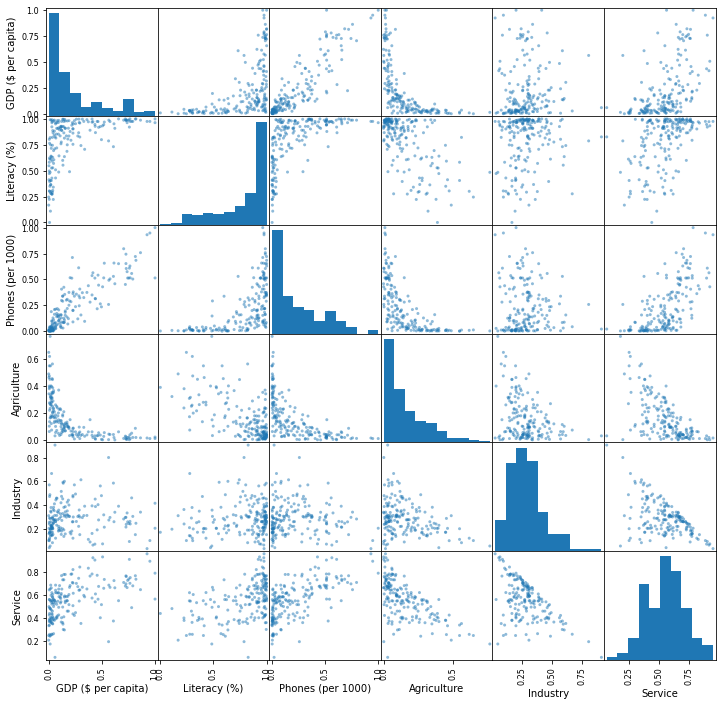

In [15]:
scatter_matrix(df2, figsize = (12, 12), diagonal = 'hist')

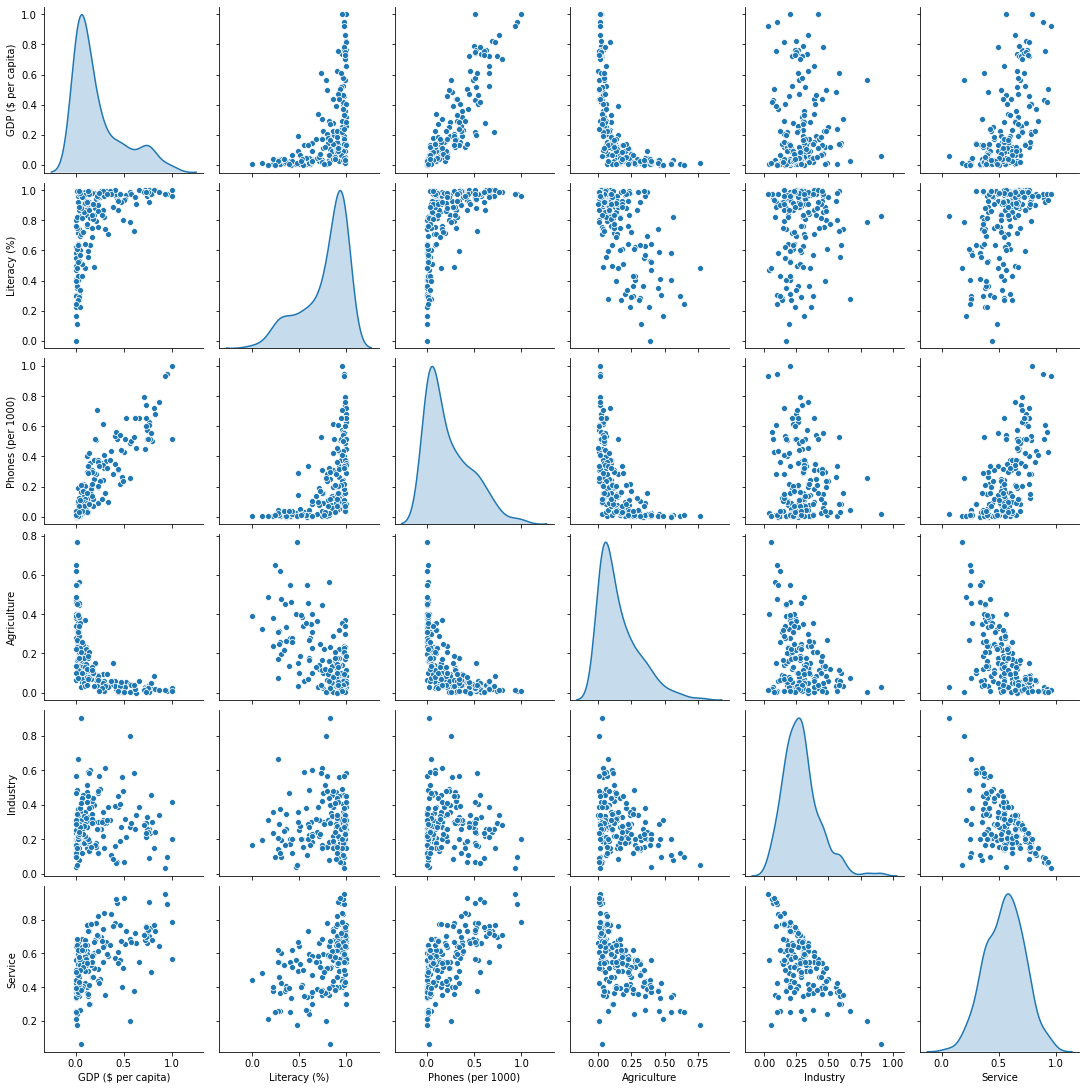

In [16]:
sns.pairplot(df2, diag_kind='kde')

## 4) Encontrar el número óptimo de clusters

Decide razonadamente el número óptimo de clusters en el rango 2..10. Ten en cuenta que para interpretar los datos no nos interesa tampoco tener un número excesivo de clusters. Para hacerlo calcula y pinta el diagrama del codo, el índice davies_boulding y el coeficiente silhouette en función del número de clusters.

In [16]:
X = df2.values

X[0:10]

array([[0.00536193, 0.22330097, 0.0033415 , 0.38      , 0.24      ,
        0.38      ],
       [0.10723861, 0.83616505, 0.0790822 , 0.232     , 0.188     ,
        0.579     ],
       [0.14745308, 0.63592233, 0.08676765, 0.101     , 0.6       ,
        0.298     ],
       [0.21715818, 0.93932039, 0.51214079, 0.04      , 0.18      ,
        0.78      ],
       [0.28150134, 0.86650485, 0.61227445, 0.038     , 0.22      ,
        0.743     ],
       [0.28686327, 0.96480583, 0.24526621, 0.095     , 0.358     ,
        0.547     ],
       [0.08042895, 0.98300971, 0.21775451, 0.239     , 0.343     ,
        0.418     ],
       [0.73726542, 0.96359223, 0.57462687, 0.004     , 0.333     ,
        0.663     ],
       [0.76407507, 1.        , 0.62965026, 0.038     , 0.262     ,
        0.7       ],
       [0.79088472, 0.97572816, 0.50345288, 0.018     , 0.304     ,
        0.678     ]])

In [17]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score

K_MAX = 10
score = np.zeros(K_MAX-2)
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    km = KMeans(init='random', n_clusters=k, random_state=RANDOM_STATE)
    km.fit(X)
    #plot_clusters(X, km.labels_, km.cluster_centers_)
    
    score[k-2] = -1 * km.score(X)
    davies_boulding[k-2] = davies_bouldin_score(X, km.labels_)
    silhouette[k-2] = silhouette_score(X, km.labels_)

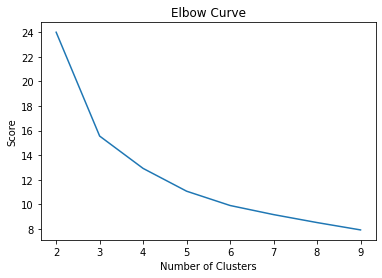

In [19]:
# diagrama del codo
plt.plot(range(2, K_MAX), score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

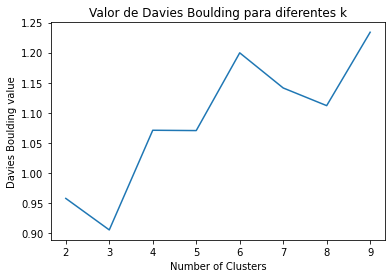

In [20]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

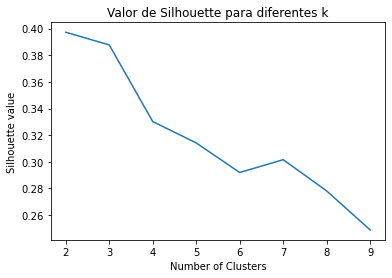

In [21]:
# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

### Algoritmo jerárquico aglomerativo

In [22]:
from sklearn.cluster import AgglomerativeClustering

# Crear una instancia del agrupador jerárquico aglomerativo
# A diferencia del algoritmo que hemos visto en clase, esta implementación sí recibe el 
# número de clusters que debe crear.
ag = AgglomerativeClustering(n_clusters=3, linkage='ward', affinity='euclidean')

# Agrupar los puntos en clusters
ag.fit(X)

# Podemos consultar el cluster asignado a cada punto
labels = ag.labels_

#plot_clusters(X, labels)

In [23]:
K_MAX = 10
davies_boulding = np.zeros(K_MAX-2)
silhouette = np.zeros(K_MAX-2)
for k in range(2, K_MAX): 
    ag = AgglomerativeClustering(n_clusters=k, linkage='ward', affinity='euclidean')
    ag.fit(X)
    #plot_clusters(X, ag.labels_)
    
    davies_boulding[k-2] = davies_bouldin_score(X, ag.labels_)
    silhouette[k-2] = silhouette_score(X, ag.labels_)

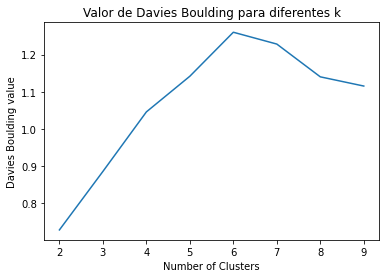

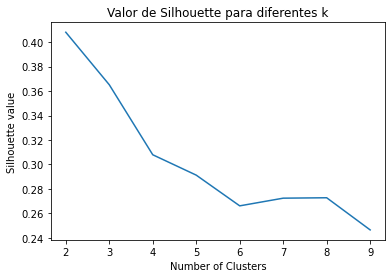

In [24]:
# davies boulding
plt.plot(range(2, K_MAX), davies_boulding)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Boulding value')
plt.title('Valor de Davies Boulding para diferentes k')
plt.show()

# silhouette
plt.plot(range(2, K_MAX), silhouette)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette value')
plt.title('Valor de Silhouette para diferentes k')
plt.show()

## 5) Descripción de los clusters

Describe los clusters que has obtenido en el apartado anterior y trata identificar el grupo de países que contienen. Si te han salido más de 3 elige 3 de ellos que sean bastante diferentes entre sí. 

Para hacerlo estudia sus descriptores estadísticos y pinta el diagrama de dispersión en función de cada par de variables usando colores diferentes para cada cluster. ¿Qué clusters se separan mejor y en función de qué variables? ¿y cuáles se confunden más?

__Cuidado__: para poder interpretar correctamente los datos necesitas que estén en su escala original. Si decidiste escalar los datos, deberás ejecutar kMeans con los datos escalados pero asignar las etiquetas de clusters al conjunto de datos inicial. En este caso es muy sencillo porque el algoritmo no cambia el orden de los datos así que puedes crear directamente una nueva columna en el dataframe original con esas etiquetas. Puede que aparezca un SettingWithCopyWarning por asignar una nueva columna en un dataframe que es una vista de otro dataframe. Puedes ignorar este aviso o puedes hacer una copia del dataframe con `copy` para que no comparta memoria con el otro.

In [25]:
X = df2.values
X

array([[0.00536193, 0.22330097, 0.0033415 , 0.38      , 0.24      ,
        0.38      ],
       [0.10723861, 0.83616505, 0.0790822 , 0.232     , 0.188     ,
        0.579     ],
       [0.14745308, 0.63592233, 0.08676765, 0.101     , 0.6       ,
        0.298     ],
       ...,
       [0.0080429 , 0.39563107, 0.04121185, 0.135     , 0.472     ,
        0.393     ],
       [0.0080429 , 0.76456311, 0.00891067, 0.22      , 0.29      ,
        0.489     ],
       [0.03753351, 0.88713592, 0.02962798, 0.179     , 0.243     ,
        0.579     ]])

In [26]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(X)

centers = km.cluster_centers_
centers

array([[0.02854111, 0.43919397, 0.01911617, 0.33489583, 0.23995833,
        0.42529167],
       [0.65770596, 0.96290344, 0.60748195, 0.02748649, 0.25145946,
        0.72102703],
       [0.16690434, 0.88370171, 0.19219439, 0.11695745, 0.32696809,
        0.55494681]])

In [27]:
df2

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service
0,0.005362,0.223301,0.003342,0.380,0.240,0.380
1,0.107239,0.836165,0.079082,0.232,0.188,0.579
2,0.147453,0.635922,0.086768,0.101,0.600,0.298
3,0.217158,0.939320,0.512141,0.040,0.180,0.780
4,0.281501,0.866505,0.612274,0.038,0.220,0.743
...,...,...,...,...,...,...
174,0.115282,0.919903,0.155825,0.040,0.419,0.541
175,0.053619,0.882282,0.208844,0.209,0.410,0.381
176,0.008043,0.395631,0.041212,0.135,0.472,0.393
177,0.008043,0.764563,0.008911,0.220,0.290,0.489


In [28]:
df5 = df2.assign(cluster=pd.Series(data=km.labels_))

In [29]:
df5

,GDP ($ per capita),Literacy (%),Phones (per 1000),Agriculture,Industry,Service,cluster
0,0.005362,0.223301,0.003342,0.380,0.240,0.380,0
1,0.107239,0.836165,0.079082,0.232,0.188,0.579,2
2,0.147453,0.635922,0.086768,0.101,0.600,0.298,2
3,0.217158,0.939320,0.512141,0.040,0.180,0.780,2
4,0.281501,0.866505,0.612274,0.038,0.220,0.743,1
...,...,...,...,...,...,...,...
174,0.115282,0.919903,0.155825,0.040,0.419,0.541,2
175,0.053619,0.882282,0.208844,0.209,0.410,0.381,2
176,0.008043,0.395631,0.041212,0.135,0.472,0.393,0
177,0.008043,0.764563,0.008911,0.220,0.290,0.489,2


In [30]:
# mostramos la matriz transpuesta para que la info salga en vertical
df5.groupby(["cluster"]).describe().transpose()

cluster                           0          1          2
GDP ($ per capita) count  48.000000  37.000000  94.000000
                   mean    0.028541   0.657706   0.166904
                   std     0.026658   0.192439   0.124535
                   min     0.000000   0.222520   0.005362
                   25%     0.008043   0.517426   0.075067
                   50%     0.022788   0.721180   0.139410
                   75%     0.037534   0.766756   0.227882
                   max     0.134048   1.000000   0.563003
Literacy (%)       count  48.000000  37.000000  94.000000
                   mean    0.439194   0.962903   0.883702
                   std     0.174921   0.048713   0.102103
                   min     0.000000   0.731796   0.490291
                   25%     0.300364   0.963592   0.825546
                   50%     0.429005   0.975728   0.908981
                   75%     0.584041   0.987864   0.971481
                   max     0.821602   1.000000   0.998786
Phones (per 1000)  count  48.000000  37.000000  94.000000
                   mean    0.019116   0.607482   0.192194
                   std     0.026081   0.142705   0.124612
                   min     0.000000   0.428492   0.003898
                   25%     0.003787   0.513032   0.087157
                   50%     0.010804   0.563934   0.161339
                   75%     0.024671   0.658053   0.295639
                   max     0.146581   1.000000   0.516373
Agriculture        count  48.000000  37.000000  94.000000
                   mean    0.334896   0.027486   0.116957
                   std     0.153267   0.020409   0.084723
                   min     0.061000   0.000000   0.002000
                   25%     0.234500   0.011000   0.051000
                   50%     0.319000   0.021000   0.099000
                   75%     0.412750   0.040000   0.163000
                   max     0.769000   0.086000   0.370000
Industry           count  48.000000  37.000000  94.000000
                   mean    0.239958   0.251459   0.326968
                   std     0.127823   0.118270   0.144052
                   min     0.040000   0.032000   0.088000
                   25%     0.168750   0.204000   0.219250
                   50%     0.206500   0.258000   0.305000
                   75%     0.287750   0.304000   0.398250
                   max     0.666000   0.585000   0.906000
Service            count  48.000000  37.000000  94.000000
                   mean    0.425292   0.721027   0.554947
                   std     0.123721   0.122343   0.139113
                   min     0.177000   0.375000   0.062000
                   25%     0.349500   0.665000   0.460000
                   50%     0.403500   0.723000   0.564000
                   75%     0.540000   0.765000   0.650000
                   max     0.643000   0.954000   0.840000

In [31]:
km = KMeans(init='random', n_clusters=3, random_state=RANDOM_STATE)
km.fit(df5)
plot_clusters(df5, km.labels_, km.cluster_centers_)

NameError: name 'plot_clusters' is not defined

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: GDP ($ per capita), dtype: object

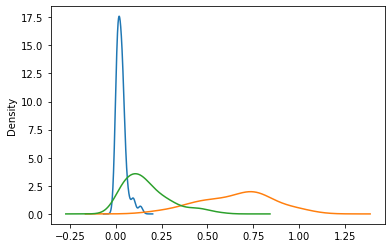

In [39]:
df5.groupby(["cluster"])["GDP ($ per capita)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Literacy (%), dtype: object

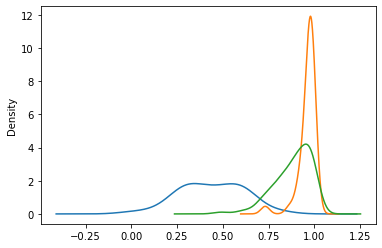

In [40]:
df5.groupby(["cluster"])["Literacy (%)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Phones (per 1000), dtype: object

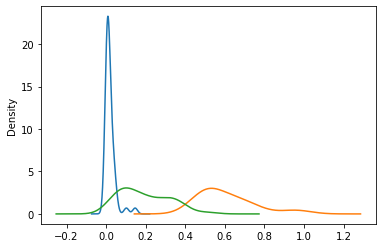

In [41]:
df5.groupby(["cluster"])["Phones (per 1000)"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Agriculture, dtype: object

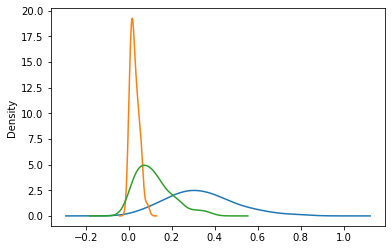

In [42]:
df5.groupby(["cluster"])["Agriculture"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Industry, dtype: object

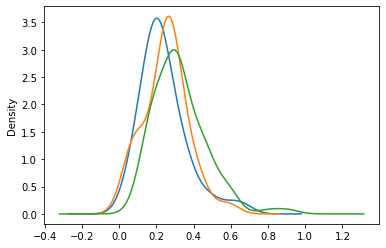

In [43]:
df5.groupby(["cluster"])["Industry"].plot.density()

cluster
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Service, dtype: object

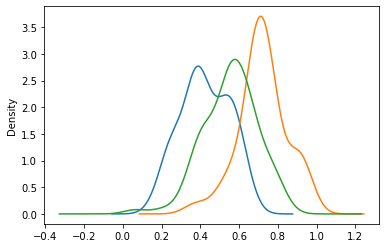

In [44]:
df5.groupby(["cluster"])["Service"].plot.density()